In [ ]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
import numpy as np

In [15]:
sys.path.append('../../../')
sys.path.append('../../')

In [16]:
import SimulationFramework.Modules.read_twiss_file as rtf

In [17]:
import SimulationFramework.Modules.plotting as plotting
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20,8)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
twiss=rtf.twiss()

In [ ]:
twiss

# Using GPT

In [ ]:
twiss.read_gdf_twiss_files('example_GPT/Gun_emitt.gdf')

In [ ]:
type(twiss)

In [ ]:
isinstance(twiss['z'], np.ndarray)

In [ ]:
twiss

In [ ]:
twiss['z']

In [ ]:
twiss['t']

In [ ]:
twiss.sort('z')

In [ ]:
twiss['z']

In [ ]:
twiss['t']

In [ ]:
twiss.z.units

In [ ]:
twiss.cp.units

In [ ]:
plotting.plot_stats_with_layout(twiss, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'], nice=True, include_layout=False)

In [ ]:
plotting.plot_stats_with_layout(twiss, ykeys=['enx', 'eny'], ykeys2=['sigma_t'], nice=True, include_layout=False)

# Using Elegant

In [ ]:
twiss.read_elegant_twiss_files('example_elegant/S02.twi')

In [ ]:
twiss.ecnx[-1]

In [ ]:
twiss.z

In [ ]:
plotting.plot_stats_with_layout(twiss, nice=True)

# Combining

In [ ]:
import sys
sys.path.append('../../../')
sys.path.append('../../')
import SimulationFramework.Framework as fw
import SimulationFramework.Modules.read_twiss_file as rtf
import SimulationFramework.Modules.plotting as plotting
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower%matplotlib inline
#twiss=rtf.twiss()

In [ ]:
lattice = fw.Framework('plotting_test', clean=False, verbose=False)
lattice.loadSettings('Lattices/CLA10-BA1_OM.def')

In [ ]:
scaling = 3
lattice.generator.number_of_particles = 2**(3*scaling)
lattice.track()

In [ ]:
lattice, twiss = plotting.load_directory('plotting_test')

In [ ]:
plotting.plot_stats_with_layout(twiss, nice=True, xkey='z', ykeys=['sigma_x', 'sigma_y'], include_layout=lattice,xlim=[0,3.7])

In [ ]:
plotting.plot_stats_with_layout(twiss, nice=True, xkey='z', ykeys=['cp_eV'], ykeys2=['sigma_cp_eV'], include_layout=lattice,xlim=[0,3.7])

# Beams

In [76]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import sys
import numpy as np

In [78]:
sys.path.append('../../../')
sys.path.append('../../')

In [79]:
import SimulationFramework.Modules.read_beam_file as rbf
beam=rbf.beam()

In [80]:
beam.read_SDDS_beam_file('c:/mad/lucy/start.out')

In [88]:
beam.normalized_emittance('x')

2.8764994228692544e-07

In [82]:
beam.normalized_emittance('y', corrected=False)

2.850418644985634e-07

In [85]:
beam.twiss('y', corrected=False)

[0.001202073972076933, 0.38061466917299586, 952.410211837111]

In [89]:
beam.twiss('x', corrected=False)

[0.0011890771293118314, 1.7009145064196163, 3274.0602456981]

In [90]:
beam.mean_energy

249999946.18197742

# Testing Determining file type

In [27]:
import os

In [28]:
filename = 'example_GPT/EBT-BA1-DIA-BPM-01.hdf5'

In [29]:
pre, ext = os.path.splitext(os.path.basename(filename))

In [30]:
pre, ext

('EBT-BA1-DIA-BPM-01', '.hdf5')

In [31]:
ext.lower()[:4] == '.hdf'

True

In [33]:
import re

In [39]:
filename='example_optimisation/Gun.0106.001'

In [40]:
run_extension = '001'

In [41]:
re.match('.*.\d\d\d\d.'+run_extension, filename)

<re.Match object; span=(0, 33), match='example_optimisation/Gun.0106.001'>

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np

In [3]:
sys.path.append('../../../')
sys.path.append('../../')

In [46]:
import SimulationFramework.Modules.read_beam_file as rbf
import SimulationFramework.Modules.plotting as plotting
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower%matplotlib inline
beam=rbf.beam()

In [47]:
filename = 'example_GPT/EBT-BA1_out.gsf'

In [48]:
beam.read_beam_file('example_GPT/EBT-BA1-DIA-YAG-01.hdf5')

In [49]:
group=rbf.beamGroup('example_GPT/EBT-BA1-DIA-YAG-01.hdf5')

In [50]:
group

['example_GPT/EBT-BA1-DIA-YAG-01.hdf5']

In [51]:
group=rbf.beamGroup('example_GPT/')

In [52]:
group.sort(key='starting_position', function=lambda x: x[2])

['example_GPT/laser.hdf5', 'example_GPT/CLA-S01-DIA-BPM-01.hdf5', 'example_GPT/CLA-S01-DIA-SCR-01.hdf5', 'example_GPT/CLA-L01-APER.hdf5', 'example_GPT/CLA-S02-APER-01.hdf5', 'example_GPT/CLA-S02-DIA-BPM-01.hdf5', 'example_GPT/CLA-S02-DIA-SCR-01-W.hdf5', 'example_GPT/CLA-S02-DIA-SCR-02-W.hdf5', 'example_GPT/CLA-C2V-MARK-01.hdf5', 'example_GPT/CLA-C2V-DIA-BPM-01.hdf5', 'example_GPT/CLA-C2V-DIA-SCR-01.hdf5', 'example_GPT/CLA-C2V-MARK-02.hdf5', 'example_GPT/EBT-INJ-DIA-YAG-05.hdf5', 'example_GPT/EBT-INJ-DIA-YAG-06.hdf5', 'example_GPT/EBT-INJ-DIA-FCUP-02.hdf5', 'example_GPT/EBT-INJ-DIA-BPM-04.hdf5', 'example_GPT/EBT-INJ-DIA-YAG-07.hdf5', 'example_GPT/EBT-INJ-DIA-BPM-05.hdf5', 'example_GPT/EBT-INJ-DIA-YAG-08.hdf5', 'example_GPT/EBT-INJ-DIA-ICT-03.hdf5', 'example_GPT/EBT-INJ-DIA-YAG-10.hdf5', 'example_GPT/EBT-INJ-PSS-SHUT-02.hdf5', 'example_GPT/EBT-BA1-DIA-BPM-01.hdf5', 'example_GPT/EBT-BA1-DIA-YAG-01.hdf5', 'example_GPT/EBT-BA1-DIA-BPM-02.hdf5', 'example_GPT/EBT-BA1-LASERBOX-BEG.hdf5', 'exam

In [54]:
len(group[0])

512

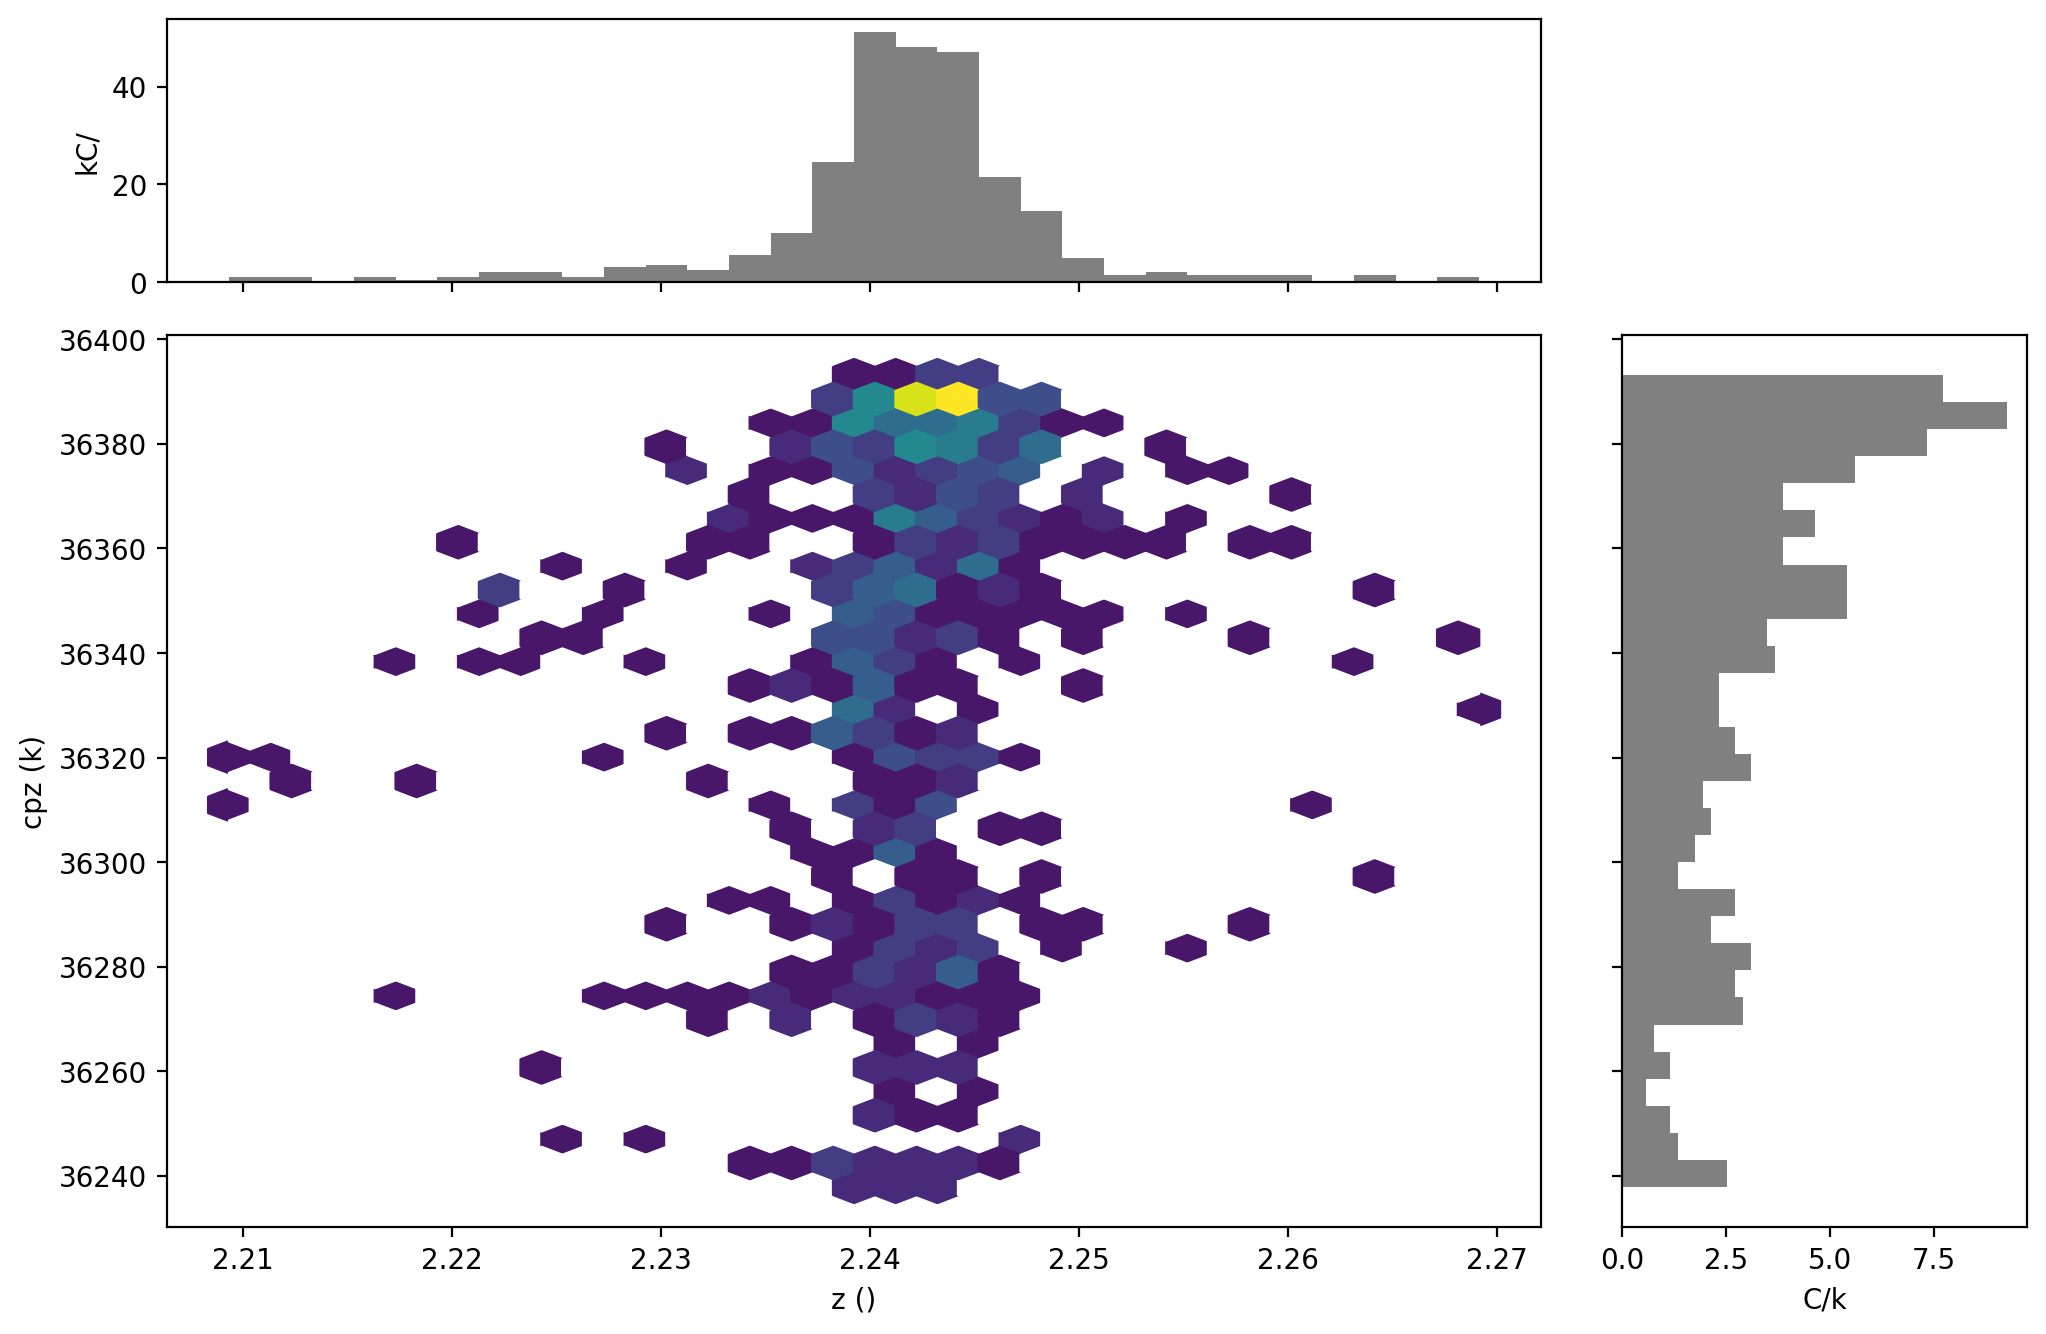

In [75]:
plotting.plot(group[-1],'z', 'cpz', bins=30)